<a href="https://colab.research.google.com/github/AnannyaSagar/Bank-Effectiveness-Prediction/blob/main/Bank_Marketing_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter Notes/bank-full.csv', sep = ";")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df=df.drop('duration', axis=1)

In [ ]:
df1 = df.copy()

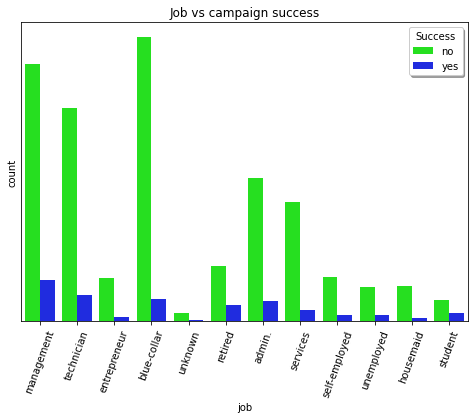

In [ ]:
plt.figure(figsize=(8, 5.5));
plt.title('Job vs campaign success')
g = sns.countplot(x= 'job', hue = 'y', data=df, palette='hsv')
plt.xticks(rotation=70)
plt.yticks([])
plt.legend(title='Success', ncol=1, fancybox=True, shadow=True)
plt.show()

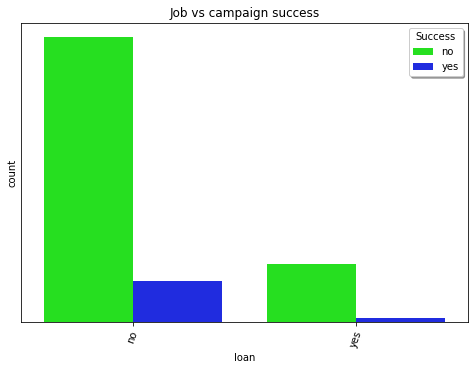

In [ ]:
plt.figure(figsize=(8, 5.5));
plt.title('Job vs campaign success')
g = sns.countplot(x= 'loan', hue = 'y', data=df1, palette='hsv')
plt.xticks(rotation=70)
plt.yticks([])
plt.legend(title='Success', ncol=1, fancybox=True, shadow=True)
plt.show()

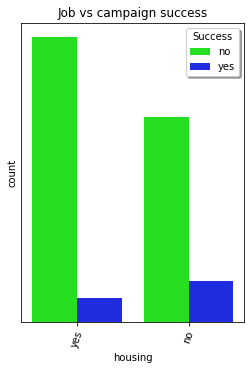

In [ ]:
plt.figure(figsize=(4, 5.5));
plt.title('Job vs campaign success')
g = sns.countplot(x= 'housing', hue = 'y', data=df1, palette='hsv')
plt.xticks(rotation=70)
plt.yticks([])
plt.legend(title='Success', ncol=1, fancybox=True, shadow=True)
plt.show()

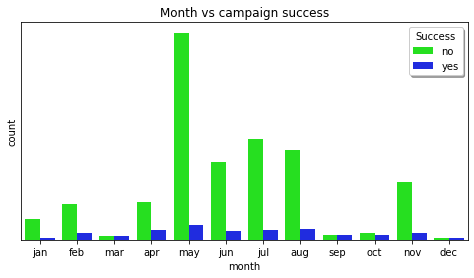

In [ ]:
plt.figure(figsize=(8, 4));
plt.title('Month vs campaign success')
g = sns.countplot(x= 'month', hue = 'y', data=df1, order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], palette='hsv');
plt.legend(title='Success', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
plt.show()

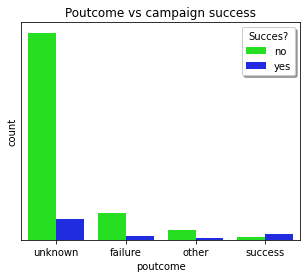

In [ ]:
plt.figure(figsize=(5, 4));
plt.title('Poutcome vs campaign success')
g = sns.countplot(x= 'poutcome', hue = 'y', data=df1, palette='hsv');
plt.legend(title='Succes?', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='age_cate', y='balance', hue='y', data=df1, palette='hsv')
plt.ylabel('balance($) log transform.')
plt.xlabel('Age')
plt.title('Balance VS Age by Deposit')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.3, 0.6), title='Success', loc = 'lower right', fontsize=13, fancybox=True, shadow=True, frameon=True)
plt.show()

ValueError: ignored

<Figure size 432x288 with 0 Axes>

From this plot we can see that older customers tends to have a higher bank balance and that customers who accepted the deposit tended to have a higher balance compared to the customers who refused the deposit.

In [ ]:
df_unknown=df1.loc[(df1["education"]=="unknown") & (df1["job"]=="unknown") & (df1["contact"]=="unknown") & (df1["poutcome"]=="unknown") & (df1["balance"]==0) ]

In [ ]:
len(df_unknown)

5

In [ ]:
df_unknown.index

Int64Index([9058, 9456, 9605, 10168, 11812], dtype='int64')

In [ ]:
df1.drop(df_unknown.index,inplace=True)

In [ ]:
df1=df1.reset_index()

In [ ]:
# quick check
df1.loc[(df["education"]=="unknown") & (df1["job"]=="unknown") & (df1["contact"]=="unknown") & (df1["poutcome"]=="unknown") & (df1["balance"]==0)]

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y


In [ ]:

df1['default'] = df1['default'].map({'yes':1,'no':0})
df1['housing'] = df1['housing'].map({'yes':1,'no':0})
df1['loan'] = df1['loan'].map({'yes':1,'no':0})
df1['y'] = df1['y'].map({'yes':1,'no':0})
df1=pd.get_dummies(df1,columns=["job", "education", "marital", "contact", "month", "poutcome"])
df1.drop('index',axis=1,inplace=True)


##SMOTE

In [ ]:
pip install imblearn 

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(df1['y'] == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(df1['y'] == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_smote, y_train_smote = sm.fit_resample(df1.loc[:, df1.columns != 'y'], df1['y'])
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote == 0)))

Before OverSampling, counts of label '1': 5289
Before OverSampling, counts of label '0': 39917 

After OverSampling, the shape of train_X: (79834, 47)
After OverSampling, the shape of train_y: (79834,) 

After OverSampling, counts of label '1': 39917
After OverSampling, counts of label '0': 39917


In [ ]:
from sklearn.preprocessing import StandardScaler
x_train_smote_sc = StandardScaler().fit_transform(x_train_smote)

In [ ]:
from sklearn.model_selection import train_test_split

xx_train_smote, xx_test_smote, yy_train_smote, yy_test_smote = train_test_split(x_train_smote_sc, y_train_smote, test_size = 0.2, random_state = 3)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(random_state = 42)
parameters = {
    "n_estimators":[50,250,500],
    "max_depth":[3,5,9],
    'min_samples_split':[200,500],'min_samples_leaf':[50,100]}


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(gbc, parameters,scoring=f1_score,cv=5, n_jobs=-1,verbose=10)

clf.fit(xx_train_smote, yy_train_smote)
clf.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GradientBoostingClassifier(min_samples_leaf=50, min_samples_split=200,
                           n_estimators=50)

{'max_depth': 3,
 'min_samples_leaf': 50,
 'min_samples_split': 200,
 'n_estimators': 50}

In [ ]:
clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 50,
 'min_samples_split': 200,
 'n_estimators': 50}

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# # Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier(max_depth= 3,max_features = 'auto',
 min_samples_leaf= 50,
 min_samples_split=200,
 n_estimators= 50)
grad_scores = cross_val_score(grad_clf, xx_train_smote, yy_train_smote, cv=5)
grad_mean = grad_scores.mean()
grad_mean

0.9131946238414802

In [ ]:
# Cross validate our Gradient Boosting Classifier
from sklearn.model_selection import cross_val_predict


In [ ]:
y_train_smote_pred = cross_val_predict(grad_clf,xx_train_smote, yy_train_smote , cv=5)

In [ ]:
y_test_smote_pred = cross_val_predict(grad_clf,xx_test_smote, yy_test_smote , cv=5)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Gradient Boost Classifier accuracy is %2.2f" % accuracy_score(yy_train_smote, y_train_smote_pred))

Gradient Boost Classifier accuracy is 0.91


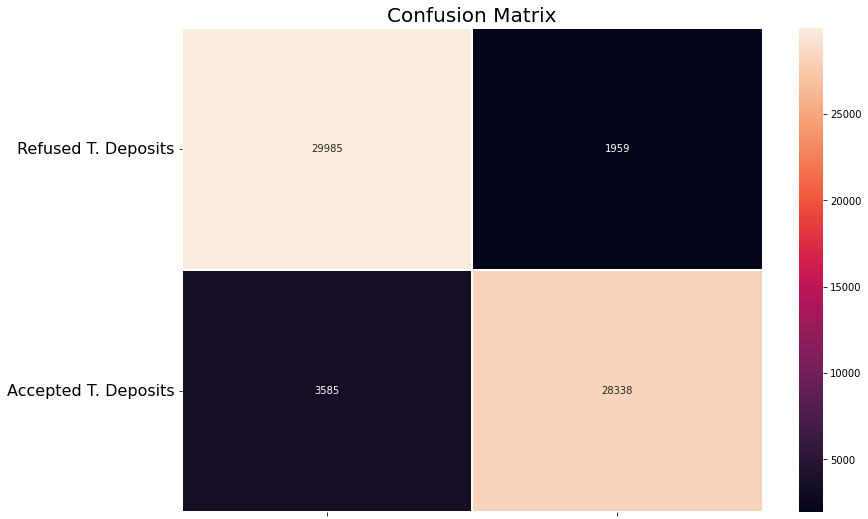

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(yy_train_smote,y_train_smote_pred )
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

In [ ]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 77% sure that the potential client will suscribe to a term deposit. 
# The model is only retaining 60% of clients that agree to suscribe a term deposit.
print('Precision Score: ', precision_score(yy_train_smote, y_train_smote_pred))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(yy_train_smote,y_train_smote_pred ))

Precision Score:  0.9353401326864046
Recall Score:  0.8876985245747581


In [ ]:
from sklearn.metrics import f1_score

f1_score(yy_train_smote, y_train_smote_pred)

0.9108968177434907

In [ ]:
f1_score(yy_train_smote, y_train_smote_pred,average = 'macro')

0.9131368418784309

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(yy_train_smote, y_train_smote_pred, sample_weight=None)

0.8274596889098079

Test dataset

In [ ]:
grad_clf.fit(xx_train_smote, yy_train_smote)

GradientBoostingClassifier(n_estimators=40)

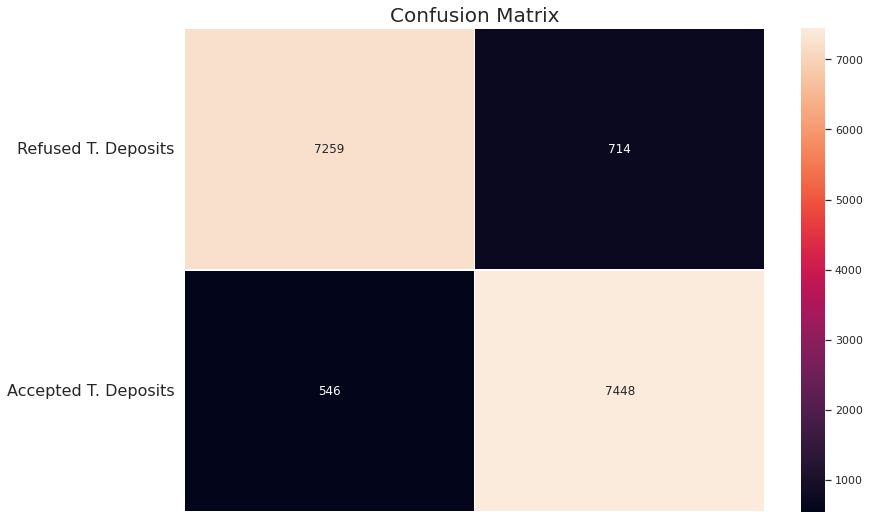

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(yy_test_smote,y_test_smote_pred )
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

In [ ]:
#grad_clf.fit(xx_train_smote, yy_train_smote)
y_test_smote_pred= grad_clf.predict(xx_test_smote)
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 77% sure that the potential client will suscribe to a term deposit. 
# The model is only retaining 60% of clients that agree to suscribe a term deposit.
print('Precision Score: ', precision_score(yy_test_smote, y_test_smote_pred))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(yy_test_smote, y_test_smote_pred))

Precision Score:  0.9187748015873016
Recall Score:  0.9268201150863148


In [ ]:
from sklearn.metrics import f1_score

f1_score(yy_test_smote, y_test_smote_pred)

0.9227799227799228

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(yy_test_smote, y_test_smote_pred, sample_weight=None)

0.8447100637904493

In [ ]:
df1['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
#df1['job'] = df1['job'].replace('unknown', np.nan)

In [ ]:
df1['age_cate'] = pd.cut(df1['age'], bins=[0, 35, 55, 70, float('Inf')], labels=['0-35', '35-55', '55-70', '70-95'])

In [ ]:
df1['age_cate'].value_counts()

35-55    23404
0-35     16907
55-70     4413
70-95      487
Name: age_cate, dtype: int64

In [ ]:
#df['marital'].value_counts()

In [ ]:
df1['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
df1['education'] = df1['education'].map({'primary':0,'secondary':1,'tertiary':2, 'unknown':3})

In [ ]:
df1['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [ ]:
df1['contact'] = df1['contact'].map({'telephone':0,'cellular':2,'unknown':1})

In [ ]:
df1['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [ ]:
df1['month'] = df1['month'].map({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})

In [ ]:
df1['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [ ]:
df1['poutcome'] = df1['poutcome'].map({'failure':0,'success':1,'other':2,'unknown':3})

In [ ]:
df1['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df1['job'] = df1['job'].map({'management':0,'blue-collar':1,'technician':2,'admin.':3,'services':4,'retired':5,'self-employed':6,'student':7,'entrepreneur':8,'unemployed':9,'housemaid':10,'unknown':11})

In [ ]:
df1['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
df1['marital'] = df1['marital'].map({'married':0,'single':1,'divorced':2})

In [ ]:
df1.reset_index(inplace= True)

In [ ]:
df1.columns

Index(['index', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_cate'],
      dtype='object')

In [ ]:
df1.shape

(45211, 18)

In [ ]:
df1.drop(columns = "index", axis =1,inplace = True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df1[["job", "education", "marital", "default", "housing", "loan", "contact", "month",
                                     "poutcome", "age_cate"]]).toarray())
# merge with main df1 on key values
df1 = df1.join(enc_df)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,age_cate,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,58,0,0,2,no,2143,yes,no,1,5,4,1,-1,0,3,no,55-70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,44,2,1,1,no,29,yes,no,1,5,4,1,-1,0,3,no,35-55,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,33,8,0,1,no,2,yes,yes,1,5,4,1,-1,0,3,no,0-35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,47,1,0,3,no,1506,yes,no,1,5,4,1,-1,0,3,no,35-55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,33,11,1,3,no,1,no,no,1,5,4,1,-1,0,3,no,0-35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
df1.columns

Index([      'age',       'job',   'marital', 'education',   'default',
         'balance',   'housing',      'loan',   'contact',       'day',
           'month',  'campaign',     'pdays',  'previous',  'poutcome',
               'y',  'age_cate',           0,           1,           2,
                 3,           4,           5,           6,           7,
                 8,           9,          10,          11,          12,
                13,          14,          15,          16,          17,
                18,          19,          20,          21,          22,
                23,          24,          25,          26,          27,
                28,          29,          30,          31,          32,
                33,          34,          35,          36,          37,
                38,          39,          40,          41,          42,
                43,          44,          45,          46,          47],
      dtype='object')

In [ ]:
X= df1[ [  'balance','campaign', 
             'day', 'previous'  ,  'pdays',        0,           1,
                 2,           3,           4,           5,           6,
                 7,           8,           9,          10,          11,
                12,          13,          14,          15,          16,
                17,          18,          19,          20,          21,
                22,          23,          24,          25,          26,
                27,          28,          29,          30,          31,
                32,          33,          34,          35,          36,
                37,          38,          39,          40,          41,
                42,          43]]

In [ ]:
y = df1['y']

In [ ]:
X.head()

,balance,campaign,day,previous,pdays,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,2143,1,5,0,-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,29,1,5,0,-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1,5,0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1506,1,5,0,-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1,5,0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.9999972581034275
RF test roc-auc: 0.7812150736316794


In [ ]:
ytrain_pred

array([[0.98, 0.02],
       [0.37, 0.63],
       [0.36, 0.64],
       ...,
       [0.99, 0.01],
       [0.98, 0.02],
       [0.27, 0.73]])

In [ ]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.7287125089029308
Logistic test roc-auc: 0.7362567810864652


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.7806413065926805
Adaboost test roc-auc: 0.7792164656557131


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier= GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
ytrain_pred = gb_classifier.predict_proba(X_train)
print('GB train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = gb_classifier.predict_proba(X_test)
print('GB test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

GB train roc-auc: 0.8023301673148212
GB test roc-auc: 0.7990046317942551


In [ ]:
import xgboost as xgb
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
ytrain_pred = xgb_classifier.predict_proba(X_train)
print('XGB train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = xgb_classifier.predict_proba(X_test)
print('XGB test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

XGB train roc-auc: 0.8019593008265867
XGB test roc-auc: 0.7970562716246081


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

KNN train roc-auc: 0.8871283770850357
KNN test roc-auc: 0.6099762906110583


In [ ]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier,xgb_classifier,gb_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.7822473139026033


In [ ]:
pd.concat(pred,axis=1)

,0,1,2,3,4,5
0,0.00,0.022567,0.479534,0.2,0.026606,0.033123
1,0.14,0.025767,0.482464,0.2,0.031942,0.032478
2,0.01,0.026393,0.481900,0.0,0.031176,0.032731
3,0.08,0.021156,0.480215,0.2,0.029729,0.034225
4,0.09,0.091512,0.491658,0.2,0.129747,0.120568
...,...,...,...,...,...,...
9038,0.00,0.087217,0.482555,0.0,0.045547,0.047970
9039,0.12,0.049825,0.486867,0.0,0.077613,0.069076
9040,0.02,0.078591,0.488814,0.0,0.082240,0.079040
9041,0.17,0.286749,0.488175,0.4,0.157312,0.168245


In [ ]:
final_prediction

0       0.126972
1       0.152109
2       0.097033
3       0.140888
4       0.187248
          ...   
9038    0.110548
9039    0.133897
9040    0.124781
9041    0.278413
9042    0.136866
Length: 9043, dtype: float64

In [ ]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.74572939, 0.74572939, 0.68870523, ..., 0.09535816, 0.09534894,
       0.08571185])

In [ ]:
from sklearn.metrics import f1_score
f1_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    f1_ls.append(f1_score(y_test, y_pred))
    
f1_ls = pd.concat([pd.Series(thresholds), pd.Series(f1_ls)],
                        axis=1)
f1_ls.columns = ['thresholds', 'f1']
f1_ls.sort_values(by='f1', ascending=False, inplace=True)
f1_ls.head()

,thresholds,f1
571,0.246954,0.477715
572,0.246867,0.477509
569,0.247231,0.477263
570,0.246985,0.477056
567,0.247317,0.476810


In [ ]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data simulation
from sklearn.datasets import make_classification     # Create a synthetic dataframe
from sklearn.linear_model import LogisticRegression  # Classification model
from sklearn.model_selection import train_test_split # Split the dataframe
from sklearn.metrics import roc_curve                # Calculate the ROC curve
from sklearn.metrics import precision_recall_curve   # Calculate the Precision-Recall curve
from sklearn.metrics import f1_score                 # Calculate the F-score
# Import module for data visualization
from plotnine import *
import plotnine

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)


In [ ]:
reglogModel = LogisticRegression(random_state = 0)
reglogModel.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predict the probabilities
y_pred = reglogModel.predict_proba(X_test)

In [ ]:
# Get the probabilities for positive class
y_pred = y_pred[:, 1]

In [ ]:
# Create the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [ ]:
# Plot the ROC curve
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
df_fpr_tpr.head()

,FPR,TPR,Threshold
0,0.000000,0.000000,1.697760
1,0.000126,0.000000,0.697760
2,0.000252,0.000000,0.640817
3,0.000252,0.003666,0.573205
4,0.000377,0.003666,0.570699


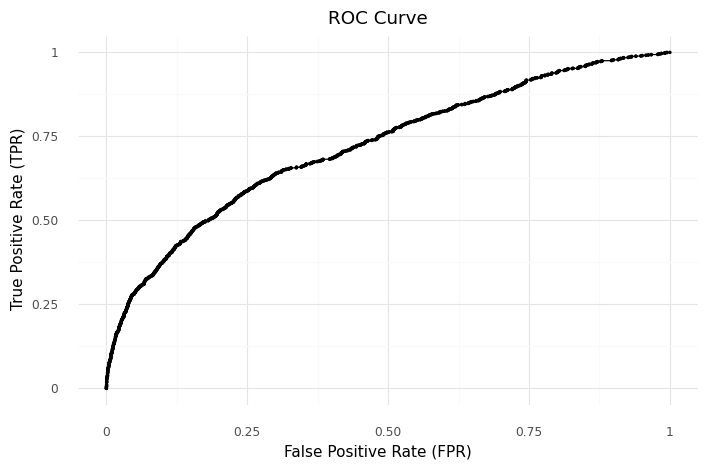

<ggplot: (8775413301841)>

In [ ]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

In [ ]:
# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))

In [ ]:
# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 0.1303 with G-Mean: 0.6691
FPR: 0.3012, TPR: 0.6407


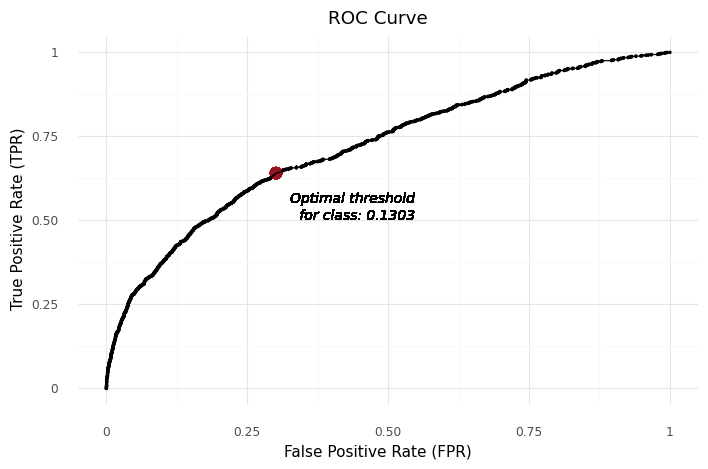

<ggplot: (8775408750689)>

In [ ]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

In [ ]:
youdenJ = tpr - fpr

In [ ]:
# Find the optimal threshold
index = np.argmax(youdenJ)
thresholdOpt = round(thresholds[index], ndigits = 4)
youdenJOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with Youden J statistic: {}'.format(thresholdOpt, youdenJOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 0.1388 with Youden J statistic: 0.6683
FPR: 0.2674, TPR: 0.6095


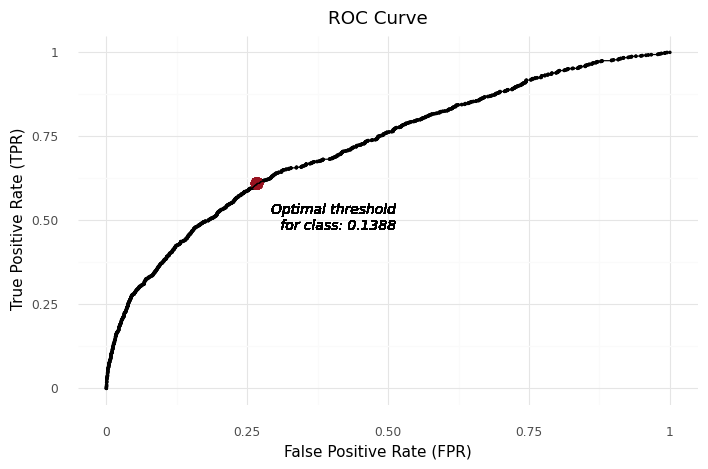

<ggplot: (8775413988173)>

In [ ]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    # Annotate the text
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

In [ ]:
# Create the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

In [ ]:
# Plot the ROC curve
df_recall_precision = pd.DataFrame({'Precision':precision[:-1],
                                    'Recall':recall[:-1],
                                    'Threshold':thresholds})
df_recall_precision.head()

,Precision,Recall,Threshold
0,0.121195,1.000000,0.011820
1,0.121098,0.999083,0.011851
2,0.121111,0.999083,0.011901
3,0.121125,0.999083,0.012248
4,0.121138,0.999083,0.012459


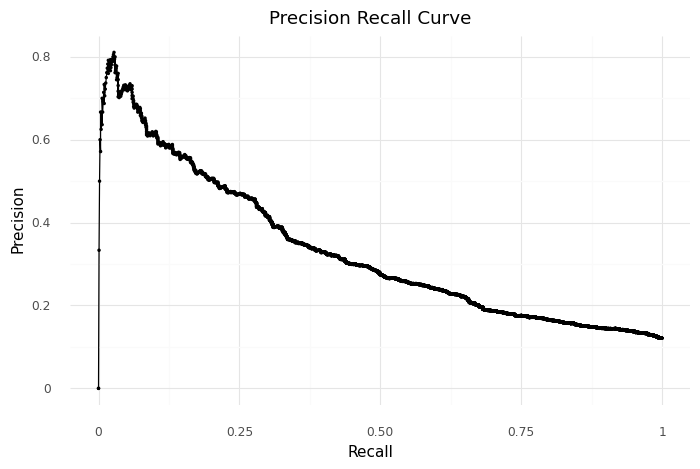

<ggplot: (8775413324449)>

In [ ]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_recall_precision)+
    geom_point(aes(x = 'Recall',
                   y = 'Precision'),
               size = 0.4)+
    geom_line(aes(x = 'Recall',
                  y = 'Precision'))+
    labs(title = 'Precision Recall Curve')+
    xlab('Recall')+
    ylab('Precision')+
    theme_minimal()
)

In [ ]:
# Calculate the f-score
fscore = (2 * precision * recall) / (precision + recall)

In [ ]:
# Find the optimal threshold
index = np.argmax(fscore)
thresholdOpt = round(thresholds[index], ndigits = 4)
fscoreOpt = round(fscore[index], ndigits = 4)
recallOpt = round(recall[index], ndigits = 4)
precisionOpt = round(precision[index], ndigits = 4)
print('Best Threshold: {} with F-Score: {}'.format(thresholdOpt, fscoreOpt))
print('Recall: {}, Precision: {}'.format(recallOpt, precisionOpt))

Best Threshold: 0.6408 with F-Score: nan
Recall: 0.0, Precision: 0.0


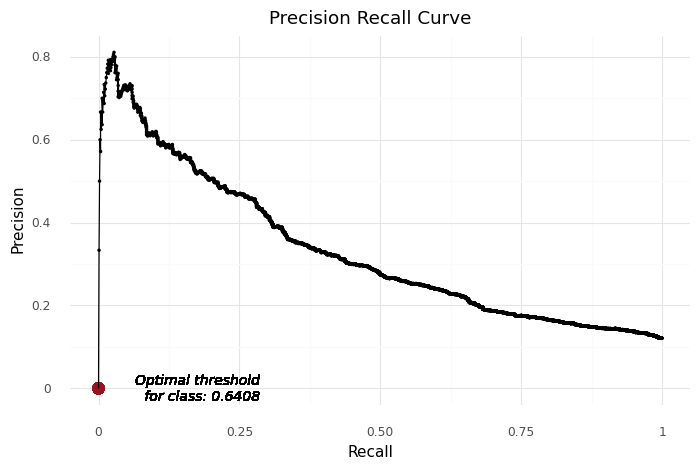

<ggplot: (8775412524533)>

In [ ]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_recall_precision)+
    geom_point(aes(x = 'Recall',
                   y = 'Precision'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = recallOpt,
                   y = precisionOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'Recall',
                  y = 'Precision'))+
    # Annotate the text
    geom_text(aes(x = recallOpt,
                  y = precisionOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.18,
              nudge_y = 0,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'Precision Recall Curve')+
    xlab('Recall')+
    ylab('Precision')+
    theme_minimal()
)

In [ ]:
# Array for finding the optimal threshold
thresholds = np.arange(0.0, 1.0, 0.0001)
fscore = np.zeros(shape=(len(thresholds)))
print('Length of sequence: {}'.format(len(thresholds)))

Length of sequence: 10000


In [ ]:
# Fit the model
for index, elem in enumerate(thresholds):
    # Corrected probabilities
    y_pred_prob = (y_pred > elem).astype('int')
    # Calculate the f-score
    fscore[index] = f1_score(y_test, y_pred_prob)

In [ ]:
# Find the optimal threshold
index = np.argmax(fscore)
thresholdOpt = round(thresholds[index], ndigits = 4)
fscoreOpt = round(fscore[index], ndigits = 4)
print('Best Threshold: {} with F-Score: {}'.format(thresholdOpt, fscoreOpt))

Best Threshold: 0.1828 with F-Score: 0.3649


In [ ]:
# Plot the threshold tuning
df_threshold_tuning = pd.DataFrame({'F-score':fscore,
                                    'Threshold':thresholds})
df_threshold_tuning.head()

,F-score,Threshold
0,0.215315,0.0000
1,0.215315,0.0001
2,0.215315,0.0002
3,0.215315,0.0003
4,0.215336,0.0004


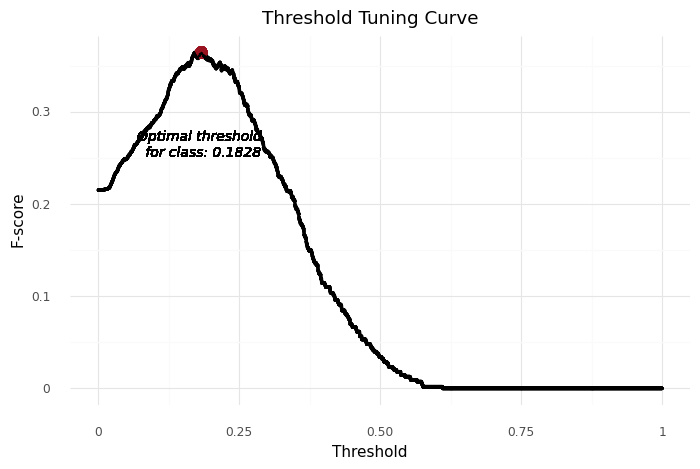

<ggplot: (8775409161361)>

In [ ]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_threshold_tuning)+
    geom_point(aes(x = 'Threshold',
                   y = 'F-score'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = thresholdOpt,
                   y = fscoreOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'Threshold',
                   y = 'F-score'))+
    # Annotate the text
    geom_text(aes(x = thresholdOpt,
                  y = fscoreOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'Threshold Tuning Curve')+
    xlab('Threshold')+
    ylab('F-score')+
    theme_minimal()
)

In [ ]:
import xgboost as xgb

In [ ]:
xgb = xgb.XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)

threshold = 0.2

predicted = xgb.predict_proba(X_test)
predicted[:,0] = (predicted[:,0] < threshold).astype('int')
predicted[:,1] = (predicted[:,1] >= threshold).astype('int')


In [ ]:
f1= f1_score(y_test, predicted[:,1])
print(round(f1,4,)*100, "%")

47.74 %


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
ac= accuracy_score(y_test, predicted[:,1])
print(round(ac,4,)*100, "%")

87.48 %


In [ ]:
pre= precision_score(y_test, predicted[:,0])
print(round(pre,4,)*100, "%")

85.42 %


In [ ]:
ac= recall_score(y_test, predicted[:,0])
print(round(ac,4,)*100, "%")

3.7600000000000002 %


In [ ]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)   
rf_model.predict_proba(X_test) #probability of the class label

array([[1.  , 0.  ],
       [0.99, 0.01],
       [0.87, 0.13],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.98, 0.02]])

In [ ]:
step_factor = 0.05 
threshold_value = 0.2 
roc_score=0
predicted_proba = rf_model.predict_proba(X_test) #probability of prediction
while threshold_value <=0.8: #continue to check best threshold upto probability 0.8
    temp_thresh = threshold_value
    predicted = (predicted_proba [:,1] >= temp_thresh).astype('int') #change the class boundary for prediction
    print('Threshold',temp_thresh,'--',roc_auc_score(y_test, predicted))
    if roc_score<roc_auc_score(y_test, predicted): #store the threshold for best classification
        roc_score = roc_auc_score(y_test, predicted)
        thrsh_score = threshold_value
    threshold_value = threshold_value + step_factor
print('---Optimum Threshold ---',thrsh_score,'--ROC--',roc_score)

Threshold 0.2 -- 0.7133263605464132
Threshold 0.25 -- 0.6930458207540384
Threshold 0.3 -- 0.6797765280961663
Threshold 0.35 -- 0.6661397117812281
Threshold 0.39999999999999997 -- 0.6548320053224941
Threshold 0.44999999999999996 -- 0.6308904066009255
Threshold 0.49999999999999994 -- 0.609627287095626
Threshold 0.5499999999999999 -- 0.5928129501113002
Threshold 0.6 -- 0.579871760351292
Threshold 0.65 -- 0.5675956518211007
Threshold 0.7000000000000001 -- 0.5437545645089603
Threshold 0.7500000000000001 -- 0.5317215506605167
---Optimum Threshold --- 0.2 --ROC-- 0.7133263605464132


In [ ]:
df1.columns

Index([      'age',       'job',   'marital', 'education',   'default',
         'balance',   'housing',      'loan',   'contact',       'day',
           'month',  'campaign',     'pdays',  'previous',  'poutcome',
               'y',  'age_cate',           0,           1,           2,
                 3,           4,           5,           6,           7,
                 8,           9,          10,          11,          12,
                13,          14,          15,          16,          17,
                18,          19,          20,          21,          22,
                23,          24,          25,          26,          27,
                28,          29,          30,          31,          32,
                33,          34,          35,          36,          37,
                38,          39,          40,          41,          42,
                43,          44,          45,          46,          47],
      dtype='object')

In [ ]:
df_train, df_test = train_test_split(df1, test_size=0.2, stratify=df1['y'], random_state=888)

features = df_train.drop(columns=['y']).columns

In [ ]:
df_train['y'].value_counts()

no     31937
yes     4231
Name: y, dtype: int64

In [ ]:
df_test['y'].value_counts()

no     7985
yes    1058
Name: y, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_weighted = LogisticRegression(class_weight='balanced', random_state=888)
clf_weighted.fit(X_train, y_train)

y_pred = clf_weighted.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)


0.7439796736082424

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_weighted = LogisticRegression(class_weight={0: 1, 1: 100}, random_state=888)

clf_weighted.fit(X_train, y_train)
y_pred = clf_weighted.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7382612483472674

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=888)


clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7362567810864652

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_weighted = RandomForestClassifier(class_weight={0: 1, 1: 100}, random_state=888)

clf_weighted.fit(X_train, y_train)
y_pred = clf_weighted.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7731649489295264

In [ ]:
import xgboost as xgb

In [ ]:


clf_weighted = xgb.XGBClassifier(class_weight={0: 1, 1: 100}, random_state=888)

clf_weighted.fit(X_train, y_train)
y_pred = clf_weighted.predict_proba(X_test)[:, 1]

from sklearn.metrics import precision_recall_score
precision_recall_score(y_test, y_pred)

ImportError: ignored

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, stratify=y_train, random_state=42)

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, auc, roc_curve

In [ ]:
import xgboost as xgb

In [ ]:
def objective(trial, X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val):
    param = {
        'objective' : 'binary:logistic',
        'eval_metric' : 'auc',
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1,1),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-2,0.5),
        'n_estimators': trial.suggest_categorical('n_estimators', [1000,1500,2000,2500,3000,3500]),
        'max_depth': trial.suggest_int('max_depth', 3,10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
    }


    model = xgb.XGBClassifier(**param,use_label_encoder=False)    
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False,)   
    preds = model.predict(X_val)
    score = accuracy_score(y_val, preds)

    return score

In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 4.3 MB/s 
     |████████████████████████████████| 210 kB 27.4 MB/s 
     |████████████████████████████████| 81 kB 8.8 MB/s 
     |████████████████████████████████| 75 kB 3.4 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 150 kB 41.1 MB/s 
     |████████████████████████████████| 113 kB 43.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=4dc5482a13f6686efb5d5a1745152465049ba73d378612b1b005475be126b5f1
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

hp = study.best_params

for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-02-26 15:09:04,150] A new study created in memory with name: no-name-ede6c555-4278-49e7-aed2-21a82a0d6a9d
[I 2022-02-26 15:10:45,890] Trial 0 finished with value: 0.8986361960928861 and parameters: {'lambda': 0.207496107151182, 'alpha': 1.7471655811418556, 'colsample_bytree': 0.8806633605490509, 'subsample': 0.8, 'learning_rate': 0.012990751234089406, 'n_estimators': 1500, 'max_depth': 5, 'min_child_weight': 17}. Best is trial 0 with value: 0.8986361960928861.
[I 2022-02-26 15:11:12,768] Trial 1 finished with value: 0.8975304091411721 and parameters: {'lambda': 0.053649643454980016, 'alpha': 0.0024096012304092285, 'colsample_bytree': 0.30243901333906986, 'subsample': 0.5, 'learning_rate': 0.03580387976179342, 'n_estimators': 1500, 'max_depth': 5, 'min_child_weight': 1}. Best is trial 0 with value: 0.8986361960928861.
[I 2022-02-26 15:11:27,263] Trial 2 finished with value: 0.8966089200147438 and parameters: {'lambda': 0.07090031054173053, 'alpha': 0.0014804723949935748, 'colsam

Number of finished trials:  50
Best trial:
  Value: 0.9001105786951714
  Params: 
    lambda: 3.3771685880676885
    alpha: 0.25498185893590775
    colsample_bytree: 0.8812797428917061
    subsample: 0.6
    learning_rate: 0.12293081695491133
    n_estimators: 2000
    max_depth: 10
    min_child_weight: 19


In [ ]:
xgb_model = xgb.XGBClassifier(**hp)

In [ ]:
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=0)

XGBClassifier(alpha=0.25498185893590775, colsample_bytree=0.8812797428917061,
              lambda=3.3771685880676885, learning_rate=0.12293081695491133,
              max_depth=10, min_child_weight=19, n_estimators=2000,
              subsample=0.6)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print ("XG Boost Classifier accuracy is %2.2f" % accuracy_score(y_test, y_pred_xgb))

XG Boost Classifier accuracy is 0.89


In [ ]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 77% sure that the potential client will suscribe to a term deposit. 
# The model is only retaining 60% of clients that agree to suscribe a term deposit.
print('Precision Score: ', precision_score(y_test, y_pred_xgb))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(y_test, y_pred_xgb))

Precision Score:  0.6265664160401002
Recall Score:  0.23629489603024575


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred_xgb)

0.34317089910775567

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, y_pred_xgb))

[[7836  149]
 [ 808  250]]


In [ ]:
print(classification_report(y_test, y_pred_xgb,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.91      0.98      0.94      7985
         Yes       0.63      0.24      0.34      1058

    accuracy                           0.89      9043
   macro avg       0.77      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043



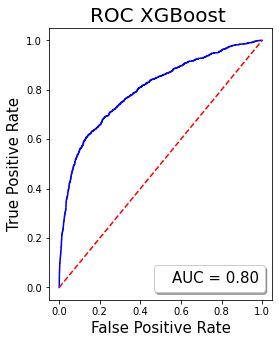

In [ ]:
plt.figure(figsize = (4, 5))

probs = xgb_model.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, _ = roc_curve(y_test, preds)
roc_aucxgb = auc(fprxgb, tprxgb)

plt.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC XGBoost ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', fontsize=15, fancybox=True, shadow=True, frameon=True,handlelength=0)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
#pip install -U imbalanced-learn

     |████████████████████████████████| 199 kB 4.1 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
eec = EasyEnsembleClassifier(n_estimators=10, base_estimator=AdaBoostClassifier(), warm_start=True, sampling_strategy='not majority', replacement=True, n_jobs=-1, random_state=42, verbose=0)

In [ ]:
eec.fit(X_train, y_train)

EasyEnsembleClassifier(base_estimator=AdaBoostClassifier(), n_jobs=-1,
                       random_state=42, replacement=True,
                       sampling_strategy='not majority', warm_start=True)

In [ ]:
y_pred = eec.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[7860   92]
 [ 886  205]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7952
         yes       0.69      0.19      0.30      1091

    accuracy                           0.89      9043
   macro avg       0.79      0.59      0.62      9043
weighted avg       0.87      0.89      0.86      9043



In [ ]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 77% sure that the potential client will suscribe to a term deposit. 
# The model is only retaining 60% of clients that agree to suscribe a term deposit.
print('Precision Score: ', precision_score(y_test, y_pred,pos_label="no"))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(y_test, y_pred, pos_label = "no"))

Precision Score:  0.898696546992911
Recall Score:  0.988430583501006


In [ ]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 77% sure that the potential client will suscribe to a term deposit. 
# The model is only retaining 60% of clients that agree to suscribe a term deposit.
print('Precision Score: ', precision_score(y_test, y_pred,pos_label="yes"))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(y_test, y_pred, pos_label = "yes"))

Precision Score:  0.6902356902356902
Recall Score:  0.18790100824931255


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred,pos_label = "no")

0.9414301113905856

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred,pos_label = "yes")

0.2953890489913545

In [ ]:
from sklearn.metrics import accuracy_score
print ("EEC accuracy is %2.2f" % accuracy_score(y_test, y_pred))

EEC accuracy is 0.89


In [ ]:
eec = EasyEnsembleClassifier(n_estimators=10, base_estimator=AdaBoostClassifier(), warm_start=True, sampling_strategy='all', replacement=True, n_jobs=-1, random_state=42, verbose=0)

In [ ]:
eec.fit(X_train, y_train)

EasyEnsembleClassifier(base_estimator=AdaBoostClassifier(), n_jobs=-1,
                       random_state=42, replacement=True,
                       sampling_strategy='all', warm_start=True)

In [ ]:
y_pred1 = eec.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred1))

[[6148 1804]
 [ 385  706]]


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

          no       0.94      0.77      0.85      7952
         yes       0.28      0.65      0.39      1091

    accuracy                           0.76      9043
   macro avg       0.61      0.71      0.62      9043
weighted avg       0.86      0.76      0.79      9043



In [ ]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 77% sure that the potential client will suscribe to a term deposit. 
# The model is only retaining 60% of clients that agree to suscribe a term deposit.
print('Precision Score: ', precision_score(y_test, y_pred1,pos_label="no"))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(y_test, y_pred1, pos_label = "no"))

Precision Score:  0.9410684218582581
Recall Score:  0.7731388329979879


In [ ]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 77% sure that the potential client will suscribe to a term deposit. 
# The model is only retaining 60% of clients that agree to suscribe a term deposit.
print('Precision Score: ', precision_score(y_test, y_pred1,pos_label="yes"))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(y_test, y_pred1, pos_label = "yes"))

Precision Score:  0.28127490039840636
Recall Score:  0.6471127406049496


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred,pos_label = "no")

0.8488781498101485

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred,pos_label = "yes")

0.39211330186059423

In [ ]:
from sklearn.metrics import accuracy_score
print ("EEC accuracy is %2.2f" % accuracy_score(y_test, y_pred1))

EEC accuracy is 0.76


In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier 
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
model = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority', sampler = (NearMiss(version = 3)),
                                replacement=True,
                                random_state=0,warm_start = True)

In [ ]:
model.fit(X_train, y_train)

BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          random_state=0, replacement=True,
                          sampler=NearMiss(version=3),
                          sampling_strategy='not majority', warm_start=True)

In [ ]:
y_pred_bbc = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_bbc))

[[7744  208]
 [ 834  257]]


In [ ]:
print(classification_report(y_test, y_pred_bbc))

              precision    recall  f1-score   support

          no       0.90      0.97      0.94      7952
         yes       0.55      0.24      0.33      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.60      0.63      9043
weighted avg       0.86      0.88      0.86      9043



In [ ]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 77% sure that the potential client will suscribe to a term deposit. 
# The model is only retaining 60% of clients that agree to suscribe a term deposit.
print('Precision Score: ', precision_score(y_test, y_pred_bbc,pos_label="no"))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(y_test, y_pred_bbc, pos_label = "no"))

Precision Score:  0.9027745395197015
Recall Score:  0.9738430583501007


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred_bbc,pos_label = "no")

0.9369630973986691

In [ ]:
from sklearn.metrics import accuracy_score
print ("BBC accuracy is %2.2f" % accuracy_score(y_test, y_pred_bbc))

BBC accuracy is 0.88


In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# Model and performance
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Ensembled sampling
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedBaggingClassifier

In [ ]:
brf = BalancedRandomForestClassifier(random_state=42,sampling_strategy='not minority')
#brf_model_cv = cross_validate(brf, X_train, y_train, cv = 5, n_jobs = -1, scoring="f1_macro")

In [ ]:
print(f"{brf_model_cv['test_score'].mean():.3f} +/- {brf_model_cv['test_score'].std():.3f}")

0.623 +/- 0.003


In [ ]:
brf.fit(X_train,y_train)

BalancedRandomForestClassifier(random_state=42,
                               sampling_strategy='not minority')

In [ ]:
y_pred_brc = brf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_brc))

[[6153 1799]
 [ 362  729]]


In [ ]:
print(classification_report(y_test, y_pred_bbc))

              precision    recall  f1-score   support

          no       0.90      0.97      0.94      7952
         yes       0.55      0.24      0.33      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.60      0.63      9043
weighted avg       0.86      0.88      0.86      9043



In [ ]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 77% sure that the potential client will suscribe to a term deposit. 
# The model is only retaining 60% of clients that agree to suscribe a term deposit.
print('Precision Score: ', precision_score(y_test, y_pred_brc,pos_label="yes"))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(y_test, y_pred_brc, pos_label = "yes"))

Precision Score:  0.28837025316455694
Recall Score:  0.6681943171402384


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred_brc,pos_label = "yes")

0.40287372202265814

In [ ]:
from sklearn.metrics import accuracy_score
print ("BBC accuracy is %2.2f" % accuracy_score(y_test, y_pred_brc))

BBC accuracy is 0.76
